In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
google = yf.download(
         ['GOOG'],
         start="2004-08-19",
         end="2024-09-26",
         group_by="ticker",
         progress=False)

google.columns = google.columns.get_level_values(1)
google.head()

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19 00:00:00+00:00,2.490664,2.591785,2.390042,2.499133,2.493011,897427216
2004-08-20 00:00:00+00:00,2.515820,2.716817,2.503118,2.697639,2.691030,458857488
2004-08-23 00:00:00+00:00,2.758411,2.826406,2.716070,2.724787,2.718112,366857939
2004-08-24 00:00:00+00:00,2.770615,2.779581,2.579581,2.611960,2.605561,306396159
2004-08-25 00:00:00+00:00,2.614201,2.689918,2.587302,2.640104,2.633636,184645512


In [ ]:
google1 = google.copy()
google.reset_index(inplace=True)
google.head()

Price,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00+00:00,2.490664,2.591785,2.390042,2.499133,2.493011,897427216
1,2004-08-20 00:00:00+00:00,2.515820,2.716817,2.503118,2.697639,2.691030,458857488
2,2004-08-23 00:00:00+00:00,2.758411,2.826406,2.716070,2.724787,2.718112,366857939
3,2004-08-24 00:00:00+00:00,2.770615,2.779581,2.579581,2.611960,2.605561,306396159
4,2004-08-25 00:00:00+00:00,2.614201,2.689918,2.587302,2.640104,2.633636,184645512


In [ ]:
nabil = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')
nabil.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [ ]:
nabil.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [ ]:
print(f'Shape of Google dataset: {google.shape}')
print(f'Shape of Nabil dataset: {nabil.shape}')

Shape of Google dataset: (5060, 7)
Shape of Nabil dataset: (3083, 8)


In [ ]:
google.drop('Adj Close', axis = 1, inplace=True)
nabil.drop(['% Change', 'Turnover'], axis=1, inplace=True)

nabil = nabil.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [ ]:
print(google.isnull().sum())
print(nabil.isnull().sum())

Price
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    5060 non-null   datetime64[ns, UTC]
 1   Open    5060 non-null   float64            
 2   High    5060 non-null   float64            
 3   Low     5060 non-null   float64            
 4   Close   5060 non-null   float64            
 5   Volume  5060 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 237.3 KB


In [ ]:
nabil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3083 non-null   object
 1   Open    3083 non-null   object
 2   High    3083 non-null   object
 3   Low     3083 non-null   object
 4   Close   3083 non-null   object
 5   Volume  3083 non-null   object
dtypes: object(6)
memory usage: 144.6+ KB


#### Here all the columns are in object format or dtypes so changing them.

In [ ]:
nabil['Date'] = pd.to_datetime(nabil['Date'])
nabil['Open'] = nabil['Open'].str.replace(',', '').astype(float)
nabil['High'] = nabil['High'].str.replace(',', '').astype(float)
nabil['Low'] = nabil['Low'].str.replace(',', '').astype(float)
nabil['Close'] = nabil['Close'].str.replace(',', '').astype(float)
nabil['Volume'] = nabil['Volume'].str.replace(',', '').astype(float).astype(int)

In [ ]:
google.describe()

Price,Open,High,Low,Close,Volume
count,5060.000000,5060.000000,5060.000000,5060.000000,5.060000e+03
mean,46.181969,46.668344,45.719767,46.201323,1.149868e+08
std,44.410807,44.898584,43.973791,44.438331,1.494489e+08
min,2.470490,2.534002,2.390042,2.490913,1.584340e+05
25%,13.075677,13.181156,12.924120,13.078167,2.708111e+07
50%,27.155944,27.410246,26.969705,27.147716,5.426358e+07
75%,61.206749,61.680125,60.516376,61.002500,1.415416e+08
max,191.750000,193.309998,190.619995,192.660004,1.650833e+09


In [ ]:
nabil.describe()

,Date,Open,High,Low,Close,Volume
count,3083,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,2018-01-07 23:14:41.608822528,1294.111288,1307.948362,1277.907168,1293.011482,31310.902692
min,2011-03-20 00:00:00,421.100000,425.000000,419.000000,422.000000,24.000000
25%,2014-08-16 00:00:00,830.000000,838.000000,820.000000,830.000000,2437.500000
50%,2018-01-17 00:00:00,1162.000000,1178.000000,1145.000000,1161.000000,7090.000000
75%,2021-06-16 12:00:00,1760.500000,1778.000000,1744.500000,1760.500000,41572.500000
max,2024-09-25 00:00:00,2720.000000,2800.000000,2700.000000,2750.000000,705430.000000
std,NaN,571.436265,579.153186,566.254316,573.467567,54132.495999


## EDA

### Plotting the line graph of Google and Nabil Stock Close Price

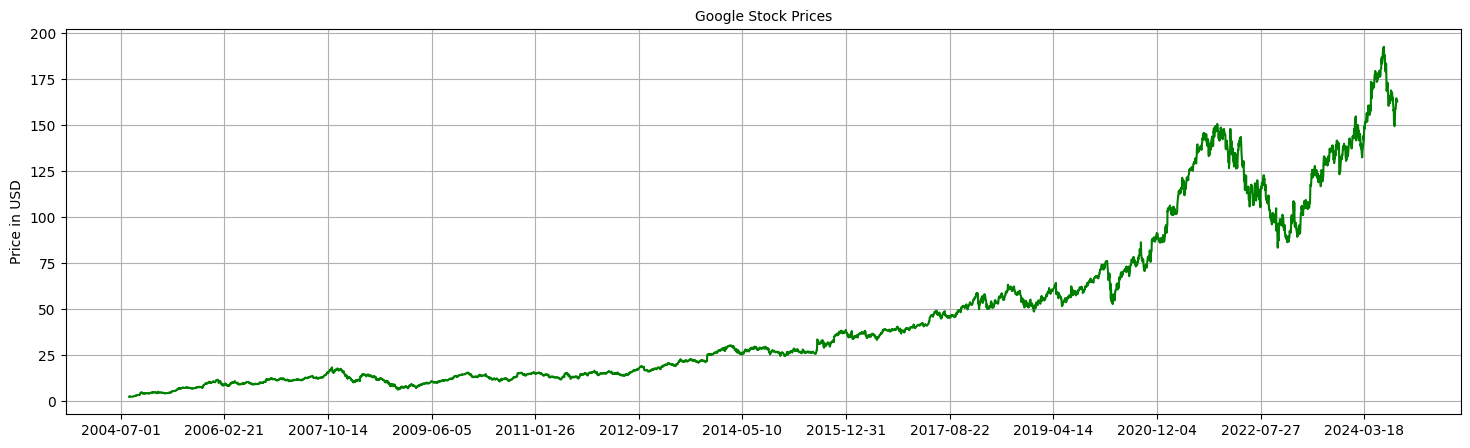

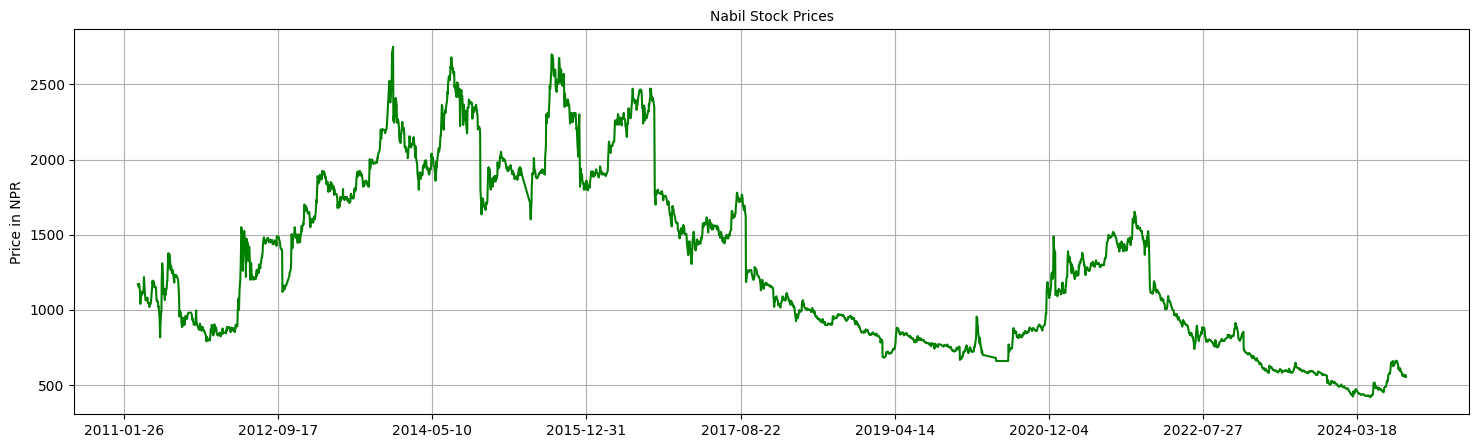

In [ ]:
# Google
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(google['Date'], google['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_ylabel('Price in USD', fontsize=10)
plt.title('Google Stock Prices', fontsize=10)
plt.grid()
plt.show()

# Nabil
fig2, ax = plt.subplots(figsize=(18, 5))
ax.plot(nabil['Date'], nabil['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylabel('Price in NPR', fontsize=10)
plt.title('Nabil Stock Prices', fontsize=10)
plt.grid()
plt.show()

### Probability Distribution

<Axes: ylabel='Density'>

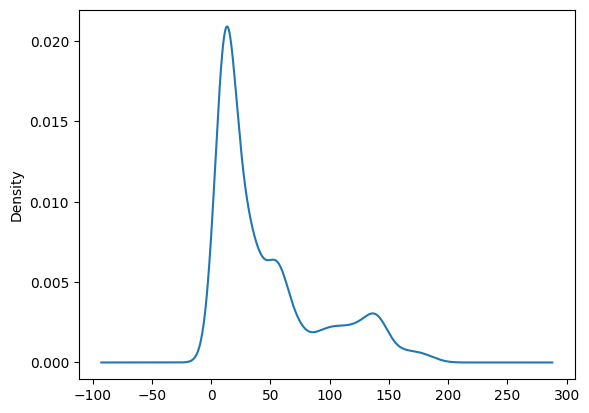

In [ ]:
google.Close.plot(kind='kde')

<Axes: ylabel='Density'>

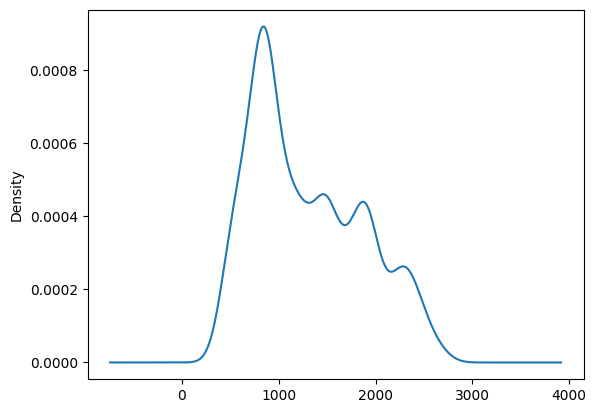

In [ ]:
nabil.Close.plot(kind='kde')

### Comparing Opening and Closing Price in both dataset

#### Google Open vs Close Price

In [ ]:
# google1 = google.copy()
# google1.set_index('Date', inplace=True)

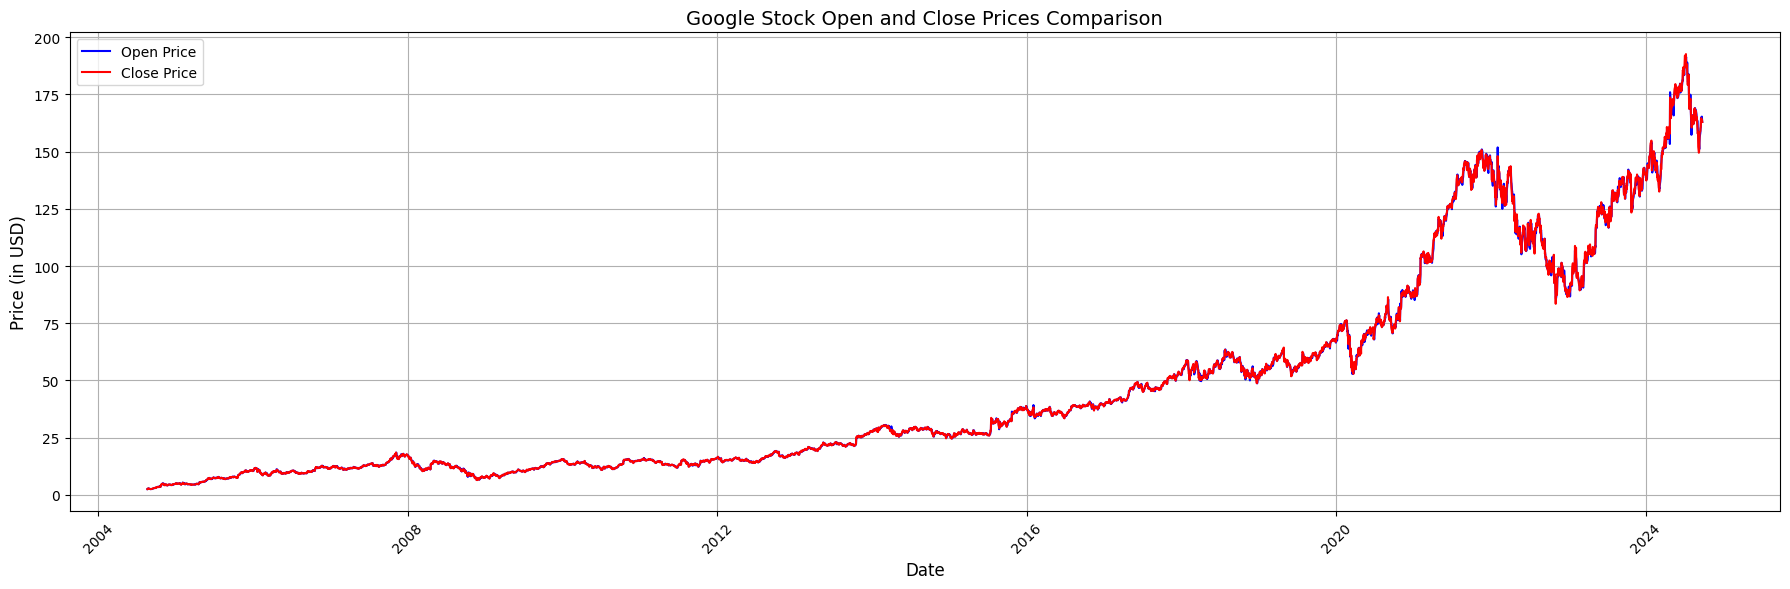

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(google1.index, google1['Open'], label='Open Price', color='blue')
plt.plot(google1.index, google1['Close'], label='Close Price', color='red')

# Customizing the graph
plt.title('Google Stock Open and Close Prices Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

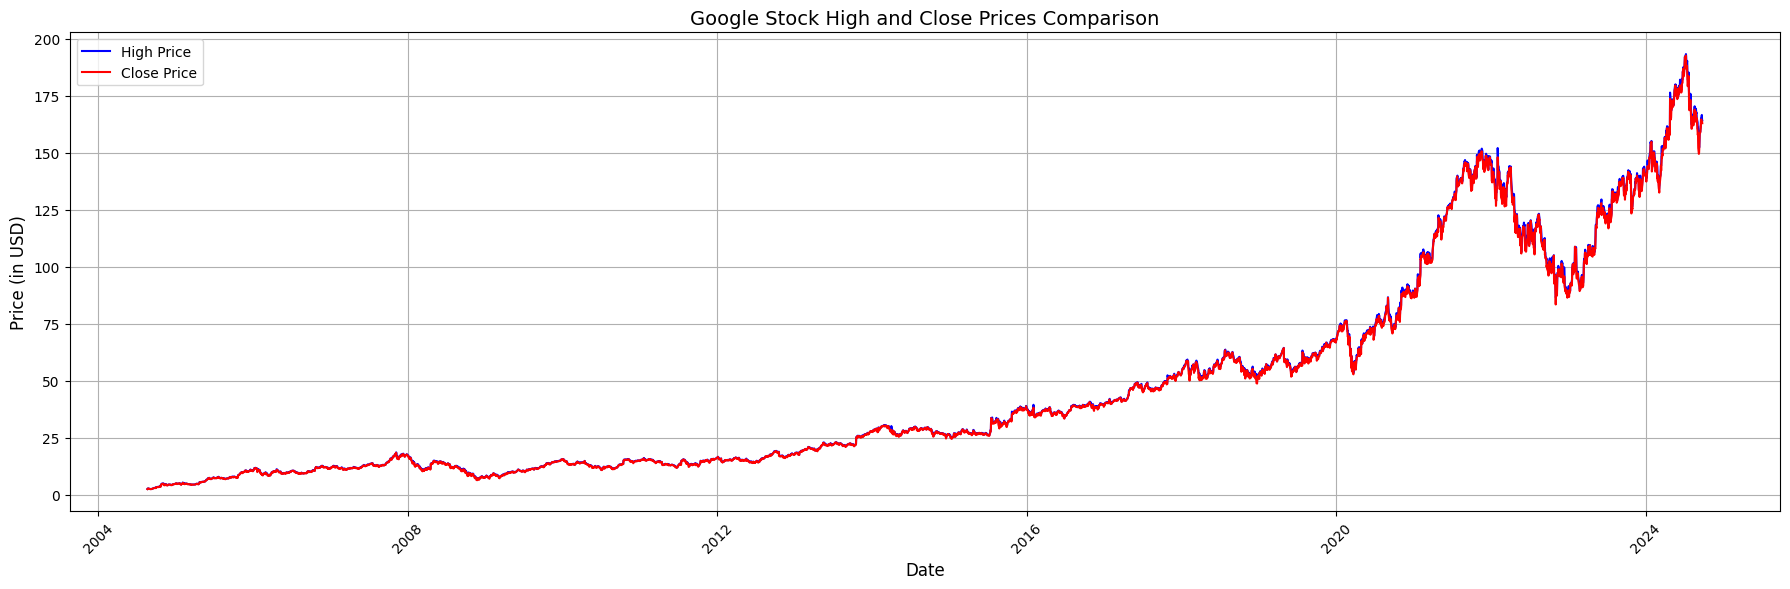

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(google1.index, google1['High'], label='High Price', color='blue')
plt.plot(google1.index, google1['Close'], label='Close Price', color='red')

# Customizing the graph
plt.title('Google Stock High and Close Prices Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

#### Nabil Open vs Close Price

In [ ]:
nabil1 = nabil.copy()
nabil1.set_index('Date', inplace=True)

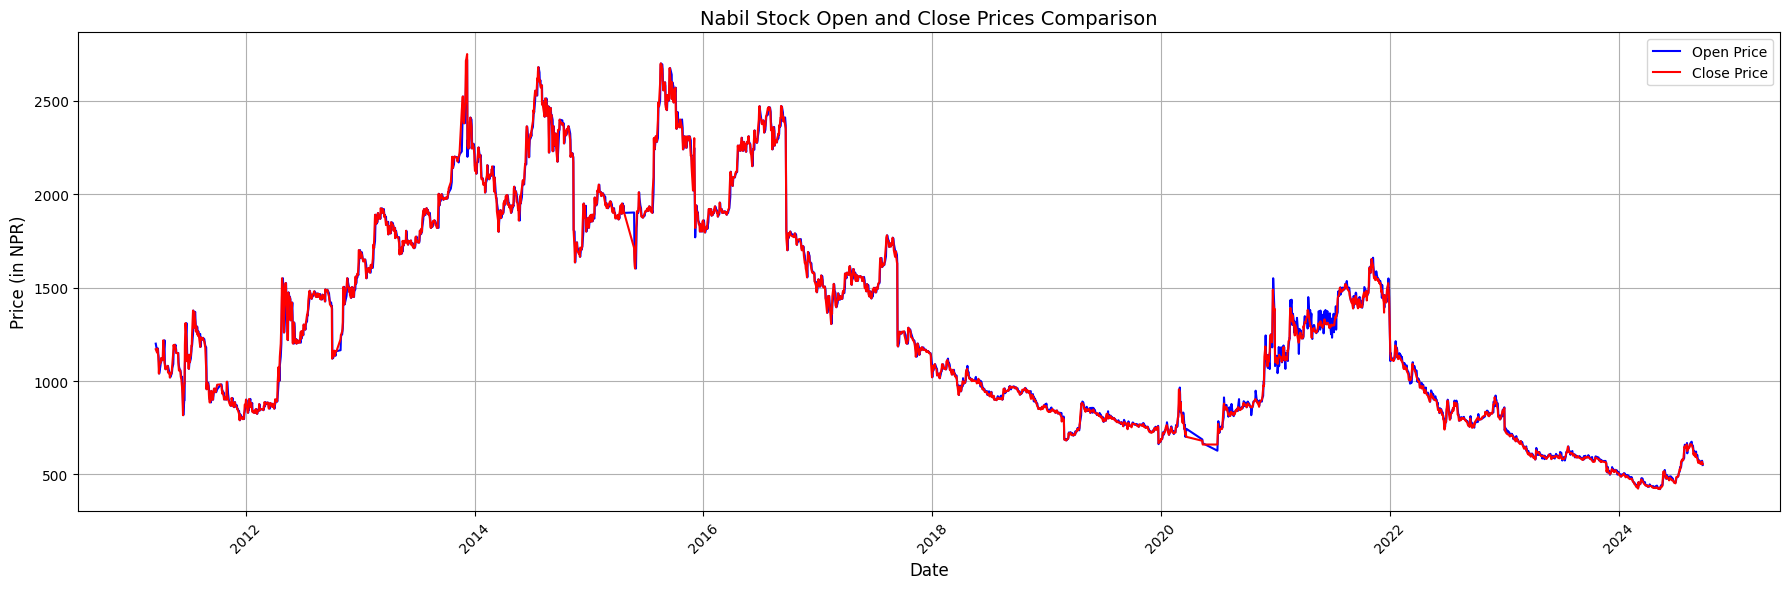

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(nabil1.index, nabil1['Open'], label='Open Price', color='blue')
plt.plot(nabil1.index, nabil1['Close'], label='Close Price', color='red')

# Customizing the graph
plt.title('Nabil Stock Open and Close Prices Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in NPR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

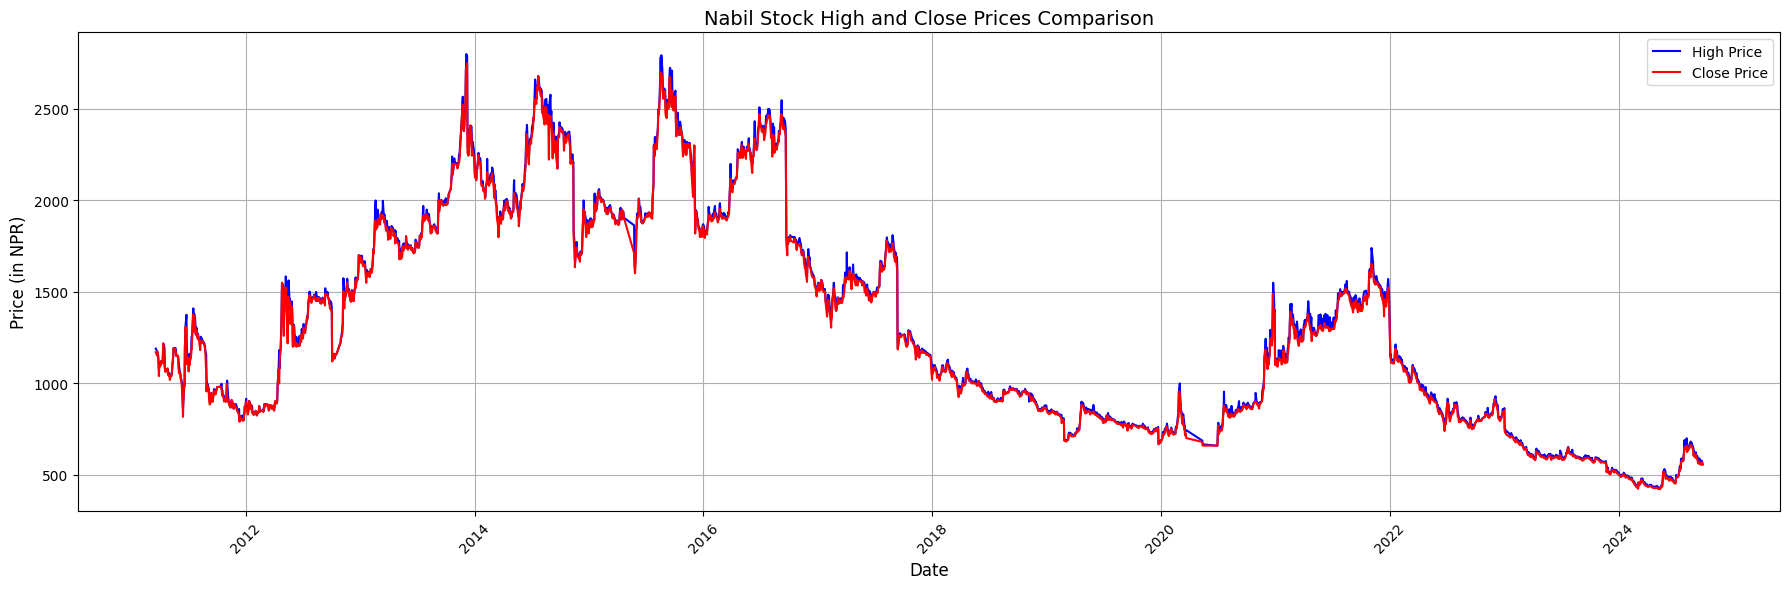

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(nabil1.index, nabil1['High'], label='High Price', color='blue')
plt.plot(nabil1.index, nabil1['Close'], label='Close Price', color='red')

# Customizing the graph
plt.title('Nabil Stock High and Close Prices Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in NPR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

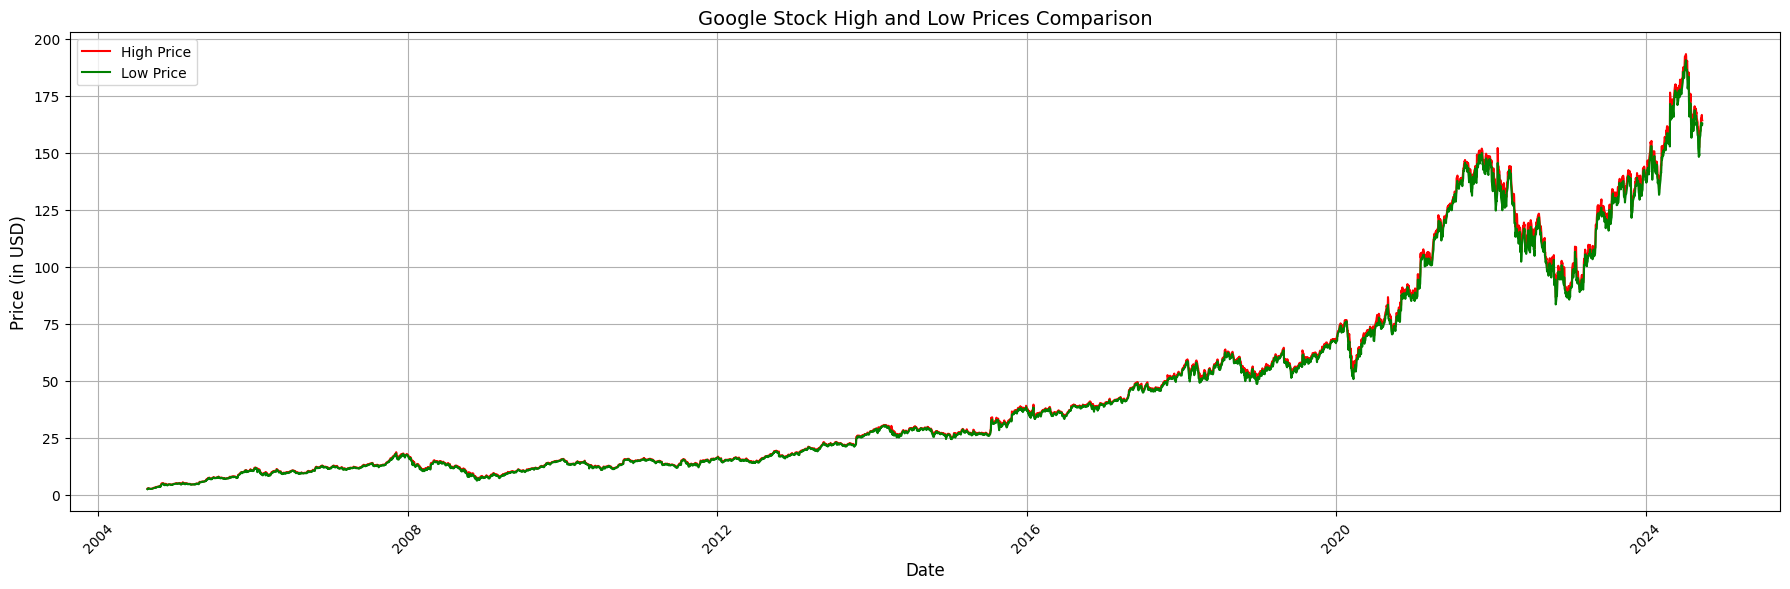

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(google1.index, google1['High'], label='High Price', color='red')
plt.plot(google1.index, google1['Low'], label='Low Price', color='green')

# Customizing the graph
plt.title('Google Stock High and Low Prices Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

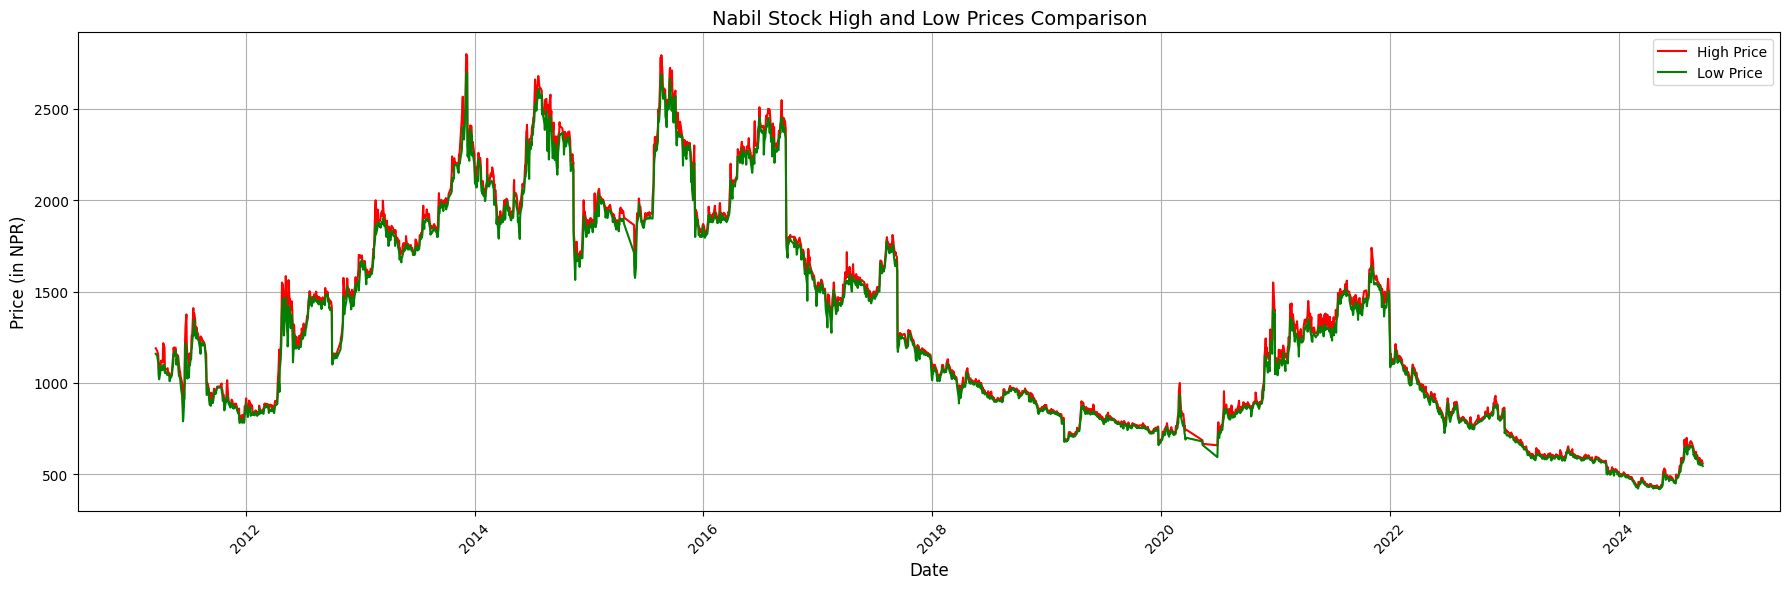

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(nabil1.index, nabil1['High'], label='High Price', color='red')
plt.plot(nabil1.index, nabil1['Low'], label='Low Price', color='green')

# Customizing the graph
plt.title('Nabil Stock High and Low Prices Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in NPR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

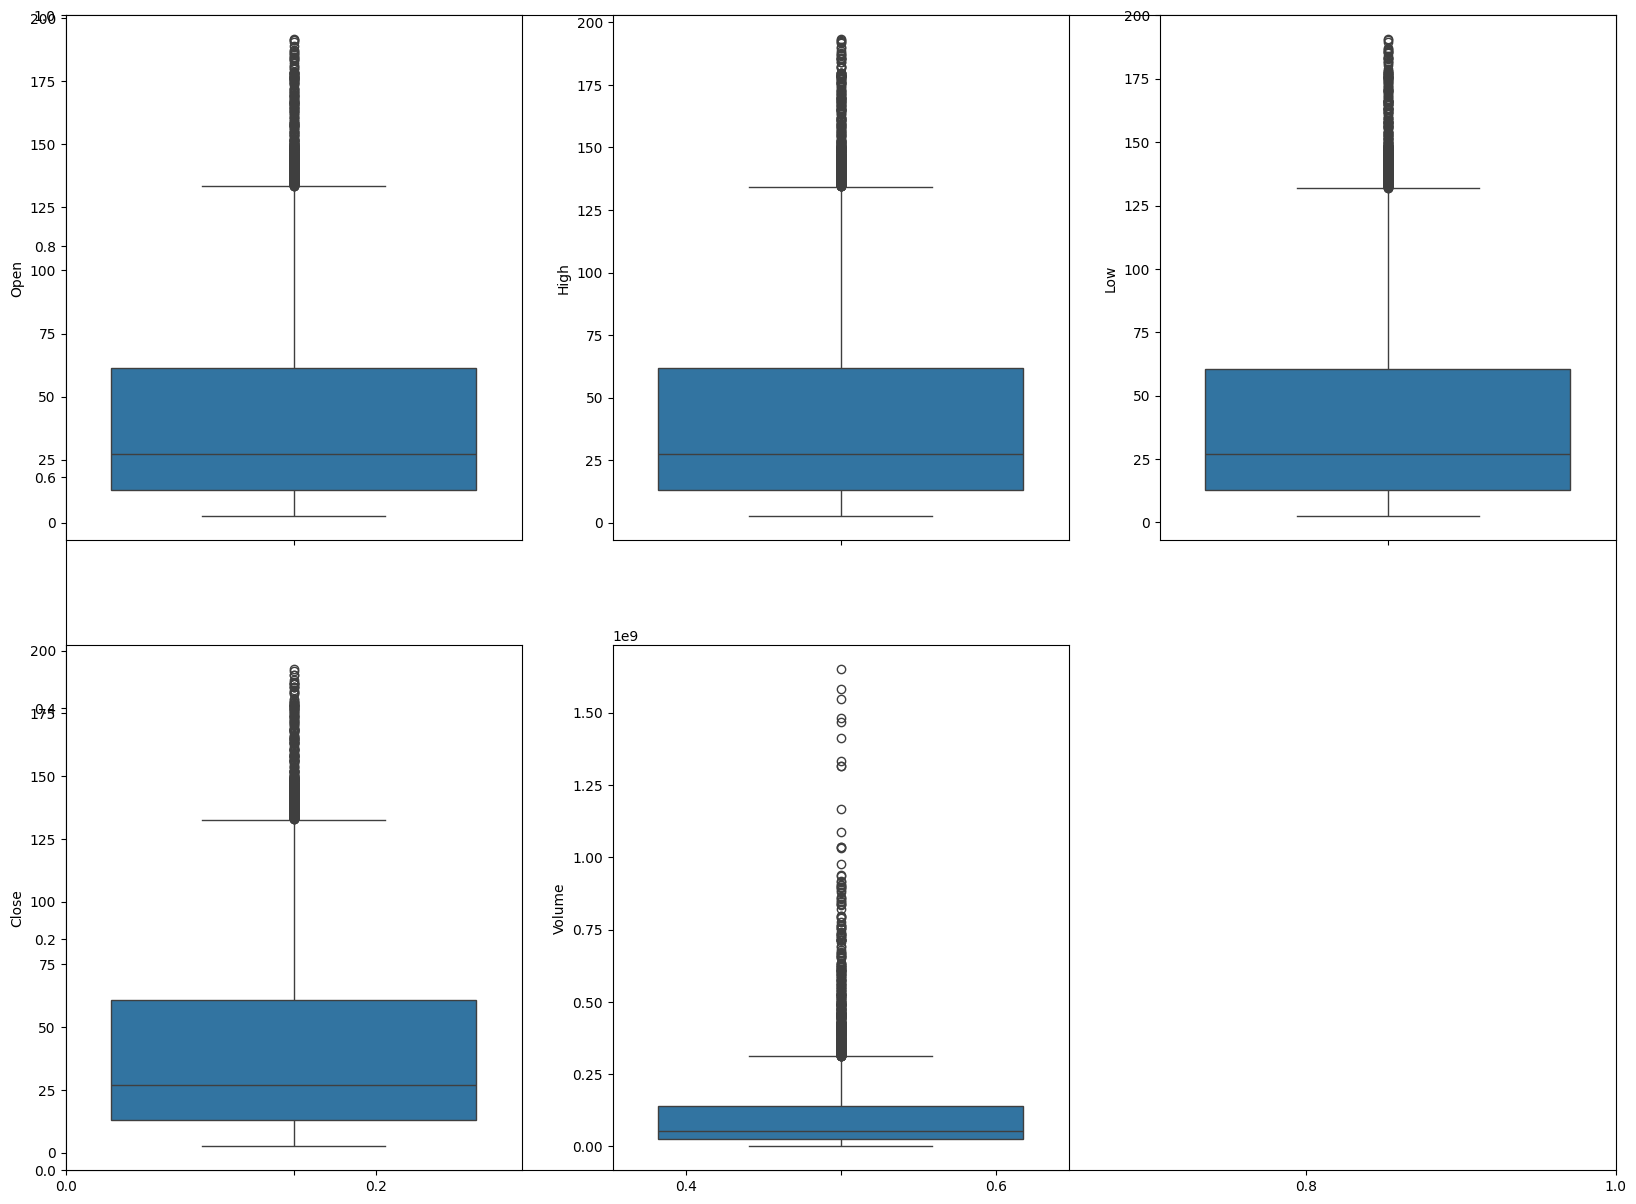

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,15))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(google1[col])

plt.show()

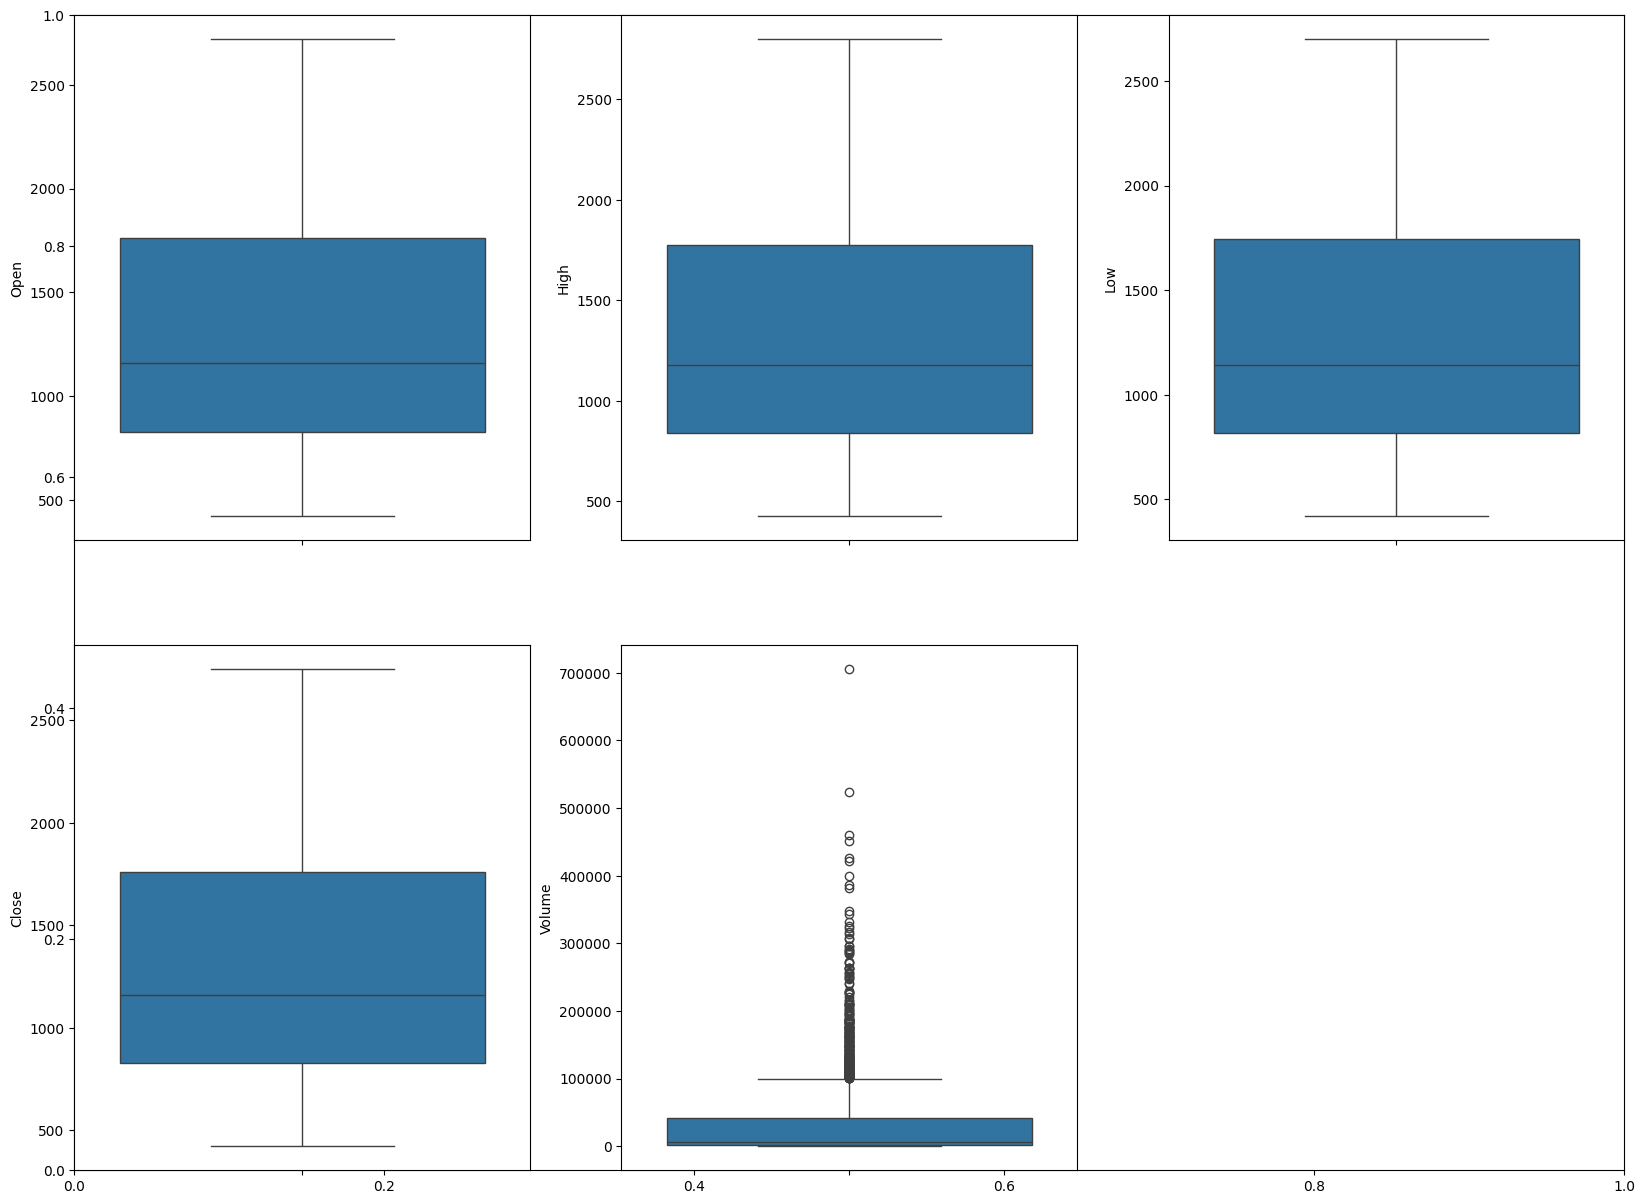

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,15))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(nabil1[col])

plt.show()

Text(0, 0.5, 'Stock Price')

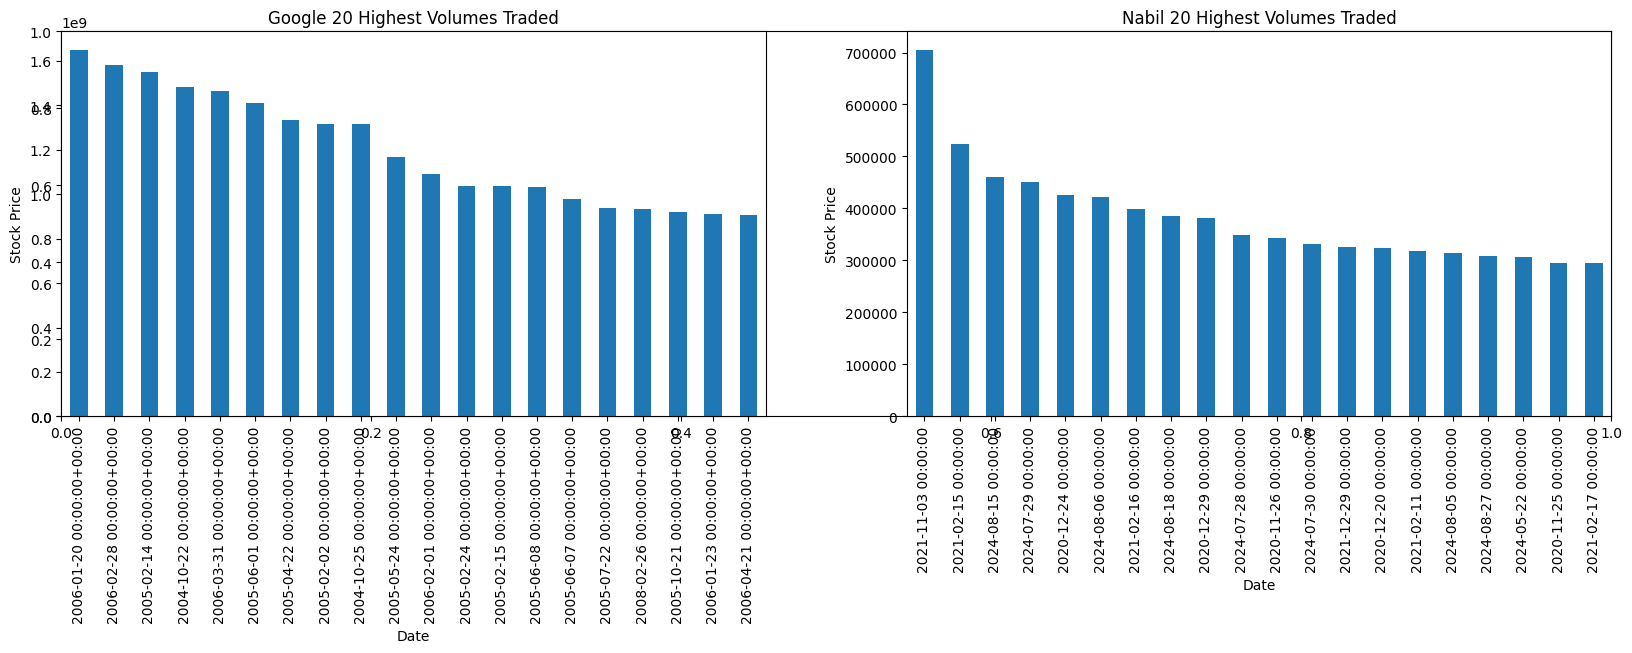

In [ ]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 2, 1)
google1.Volume.nlargest(20).plot(kind='bar')
plt.title("Google 20 Highest Volumes Traded")
plt.ylabel('Stock Price')
plt.subplot(1, 2, 2)
nabil1.Volume.nlargest(20).plot(kind='bar')
plt.title("Nabil 20 Highest Volumes Traded")
plt.ylabel('Stock Price')

In [ ]:
print(google1.Volume.nlargest(20))

Date
2006-01-20 00:00:00+00:00    1650832619
2006-02-28 00:00:00+00:00    1583416872
2005-02-14 00:00:00+00:00    1548269624
2004-10-22 00:00:00+00:00    1481207196
2006-03-31 00:00:00+00:00    1466331647
2005-06-01 00:00:00+00:00    1412944285
2005-04-22 00:00:00+00:00    1333182435
2005-02-02 00:00:00+00:00    1316889593
2004-10-25 00:00:00+00:00    1315480331
2005-05-24 00:00:00+00:00    1166078427
2006-02-01 00:00:00+00:00    1088966472
2005-02-24 00:00:00+00:00    1036442333
2005-02-15 00:00:00+00:00    1035177611
2005-06-08 00:00:00+00:00    1031889331
2005-06-07 00:00:00+00:00     976566743
2005-07-22 00:00:00+00:00     938978379
2008-02-26 00:00:00+00:00     934983461
2005-10-21 00:00:00+00:00     919128253
2006-01-23 00:00:00+00:00     913065614
2006-04-21 00:00:00+00:00     905433112
Name: Volume, dtype: int64


### Historical Annual Stock Price Data

In [ ]:
google1.reset_index(inplace=True)
# Step 1: Create new columns for Year, Month, Day of Month, Day of Year
google1['Year'] = google1['Date'].dt.year
google1['Month'] = google1['Date'].dt.month
google1['Date_in_a_month'] = google1['Date'].dt.day
google1['Date_in_a_year'] = google1['Date'].dt.dayofyear

# Step 2: Filter out the years 2004 and 2024
google_filtered = google1[~google1['Year'].isin([2004, 2024])]

# Step 3: Group by Year and calculate the required statistics
t1 = (
    google_filtered
    .groupby('Year')
    .agg(
        Average_Stock_Price=('Close', 'mean'),
        Year_Open=('Open', lambda x: x.iloc[0]),  # First entry of the year
        Year_High=('High', 'max'),
        Year_Low=('Low', 'min'),
        Year_Close=('Close', lambda x: x.iloc[-1]),  # Last entry of the year
    )
    .reset_index()
)

# Step 4: Calculate Annual Change
t1['Annual_Change (%)'] = (t1['Year_Close'] - t1['Year_Open']) / t1['Year_Open'] * 100

# Step 5: Sort by Year in descending order
t1 = t1.sort_values(by='Year', ascending=False)

# Step 6: Display the table
print(t1.to_string(index=False))

 Year  Average_Stock_Price  Year_Open  Year_High  Year_Low  Year_Close  Annual_Change (%)
 2023           119.611860  89.830002 143.945007 85.570000  140.929993          56.885216
 2022           115.193719 144.475494 152.100006 83.449997   88.730003         -38.584738
 2021           125.530687  87.876999 151.850006 84.949997  144.679504          64.638650
 2020            74.070191  67.077499  92.360001 50.676800   87.594002          30.586266
 2019            59.419653  50.828499  68.250000 50.703499   66.850998          31.522668
 2018            55.661257  52.417000  63.694500 48.505501   51.780499          -1.214303
 2017            46.089042  38.940498  53.924500 38.790001   52.320000          34.358834
 2016            37.174335  37.150002  40.834000 33.153000   38.591000           3.878864
 2015            30.100284  26.378078  38.999001 24.311253   37.944000          43.846718
 2014            27.990164  27.782366  30.607277 24.383057   26.247936          -5.523034
 2013     

In [ ]:
nabil1.reset_index(inplace=True)
# Step 1: Create new columns for Year, Month, Day of Month, Day of Year
nabil1['Year'] = nabil1['Date'].dt.year
nabil1['Month'] = nabil1['Date'].dt.month
nabil1['Date_in_a_month'] = nabil1['Date'].dt.day
nabil1['Date_in_a_year'] = nabil1['Date'].dt.dayofyear

# Step 2: Filter out the years 2004 and 2024
nabil_filtered = nabil1[~nabil1['Year'].isin([2004, 2024])]

# Step 3: Group by Year and calculate the required statistics
t1 = (
    nabil_filtered
    .groupby('Year')
    .agg(
        Average_Stock_Price=('Close', 'mean'),
        Year_Open=('Open', lambda x: x.iloc[0]),  # First entry of the year
        Year_High=('High', 'max'),
        Year_Low=('Low', 'min'),
        Year_Close=('Close', lambda x: x.iloc[-1]),  # Last entry of the year
    )
    .reset_index()
)

# Step 4: Calculate Annual Change
t1['Annual_Change (%)'] = (t1['Year_Close'] - t1['Year_Open']) / t1['Year_Open'] * 100

# Step 5: Sort by Year in descending order
t1 = t1.sort_values(by='Year', ascending=False)

# Step 6: Display the table
print(t1.to_string(index=False))

 Year  Average_Stock_Price  Year_Open  Year_High  Year_Low  Year_Close  Annual_Change (%)
 2023           604.466520      859.0      865.0     493.0       506.0         -41.094296
 2022           901.560744     1107.0     1213.0     726.0       843.0         -23.848238
 2021          1357.630126     1100.0     1740.0    1042.0      1450.0          31.818182
 2020           869.347826      683.0     1550.0     594.0      1100.0          61.054173
 2019           782.918367      861.0      900.0     660.0       681.0         -20.905923
 2018           965.150000     1020.0     1130.0     830.0       860.0         -15.686275
 2017          1438.826087     1519.0     1810.0    1015.0      1020.0         -32.850560
 2016          2045.556034     1860.0     2548.0    1421.0      1519.0         -18.333333
 2015          2095.562791     1820.0     2794.0    1575.0      1860.0           2.197802
 2014          2138.502203     2210.0     2680.0    1564.0      1820.0         -17.647059
 2013     

In [ ]:
# google1.reset_index('Date', inplace=True)
google2023 = google1[google1.Year == 2023]

# Create candlestick chart
a3 = go.Figure(data=[go.Candlestick(x=google2023['Date'],
                                    open=google2023['Open'],
                                    high=google2023['High'],
                                    low=google2023['Low'],
                                    close=google2023['Close'])])
# Add layout options
a3.update_layout(
    title={
        'text': "Google Stock Market Analysis: Candlestick Representation",
        'font': {'size': 25}
    },
    xaxis={
        'rangeslider': {'visible': False}
    },
    yaxis={
        'title': 'Price (in US Dollar)'
    },
    font={
        'family': 'Latin Modern'
    },
    margin={
        'l': 50,  # Left margin
        'r': 10,   # Right margin
        'b': 10,   # Bottom margin
        't': 50   # Top margin
    }
)
# Show the chart
a3.show()

In [ ]:
# nabil1.reset_index('Date', inplace=True)
# google1.reset_index('Date', inplace=True)
nabil2023 = nabil1[nabil1.Year == 2023]

# Create candlestick chart
a3 = go.Figure(data=[go.Candlestick(x=nabil2023['Date'],
                                    open=nabil2023['Open'],
                                    high=nabil2023['High'],
                                    low=nabil2023['Low'],
                                    close=nabil2023['Close'])])
# Add layout options
a3.update_layout(
    title={
        'text': "Nabil Stock Market Analysis: Candlestick Representation",
        'font': {'size': 25}
    },
    xaxis={
        'rangeslider': {'visible': False}
    },
    yaxis={
        'title': 'Price (in NPR)'
    },
    font={
        'family': 'Latin Modern'
    },
    margin={
        'l': 50,  # Left margin
        'r': 10,   # Right margin
        'b': 10,   # Bottom margin
        't': 50   # Top margin
    }
)
# Show the chart
a3.show()

In [ ]:
# Calculate the 20-day moving average
google1['Moving_Avg_20'] = google1['Close'].rolling(window=20).mean()
google1['Moving_Avg_50'] = google1['Close'].rolling(window=50).mean()
google1['Moving_Avg_100'] = google1['Close'].rolling(window=100).mean()

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=google1['Date'],
                                     open=google1['Open'],
                                     high=google1['High'],
                                     low=google1['Low'],
                                     close=google1['Close'],
                                     name='Candlestick')])

# Add the 20-day moving average line
fig.add_trace(go.Scatter(x=google1['Date'],
                         y=google1['Moving_Avg_20'],
                         mode='lines',
                         line=dict(color='orange', width=2),
                         name='20-Day Moving Average'))

# Add the 20-day moving average line
fig.add_trace(go.Scatter(x=google1['Date'],
                         y=google1['Moving_Avg_50'],
                         mode='lines',
                         line=dict(color='blue', width=2),
                         name='50-Day Moving Average'))

# Add the 20-day moving average line
fig.add_trace(go.Scatter(x=google1['Date'],
                         y=google1['Moving_Avg_100'],
                         mode='lines',
                         line=dict(color='yellow', width=2),
                         name='100-Day Moving Average'))

# Update layout
fig.update_layout(
    title={
        'text': "Google Stock Price with 20, 50, 100-Day Moving Average",
        'font': {'size': 25}
    },
    xaxis={
        'title': 'Date',
        'rangeslider': {'visible': False}
    },
    yaxis={
        'title': 'Stock Price (in US Dollar)'
    },
    font={
        'family': 'Latin Modern'
    },
    margin={
        'l': 50,  # Left margin
        'r': 10,   # Right margin
        'b': 10,   # Bottom margin
        't': 50   # Top margin
    }
)

# Show the chart
fig.show()

In [ ]:
nabil1['Moving_Avg_20'] = nabil1['Close'].rolling(window=20).mean()
nabil1['Moving_Avg_50'] = nabil1['Close'].rolling(window=50).mean()
nabil1['Moving_Avg_100'] = nabil1['Close'].rolling(window=100).mean()

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=nabil1['Date'],
                                     open=nabil1['Open'],
                                     high=nabil1['High'],
                                     low=nabil1['Low'],
                                     close=nabil1['Close'],
                                     name='Candlestick')])

# Add the 20-day moving average line
fig.add_trace(go.Scatter(x=nabil1['Date'],
                         y=nabil1['Moving_Avg_20'],
                         mode='lines',
                         line=dict(color='orange', width=2),
                         name='20-Day Moving Average'))

fig.add_trace(go.Scatter(x=nabil1['Date'],
                         y=nabil1['Moving_Avg_50'],
                         mode='lines',
                         line=dict(color='blue', width=2),
                         name='50-Day Moving Average'))

fig.add_trace(go.Scatter(x=nabil1['Date'],
                         y=nabil1['Moving_Avg_100'],
                         mode='lines',
                         line=dict(color='yellow', width=2),
                         name='100-Day Moving Average'))

# Update layout
fig.update_layout(
    title={
        'text': "Nabil Stock Price with 20, 50, 100-Day Moving Average",
        'font': {'size': 25}
    },
    xaxis={
        'title': 'Date',
        'rangeslider': {'visible': False}
    },
    yaxis={
        'title': 'Stock Price (in NPR)'
    },
    font={
        'family': 'Latin Modern'
    },
    margin={
        'l': 50,  # Left margin
        'r': 10,   # Right margin
        'b': 10,   # Bottom margin
        't': 50   # Top margin
    }
)

# Show the chart
fig.show()

#### Heatmap to Check Correlations

Google

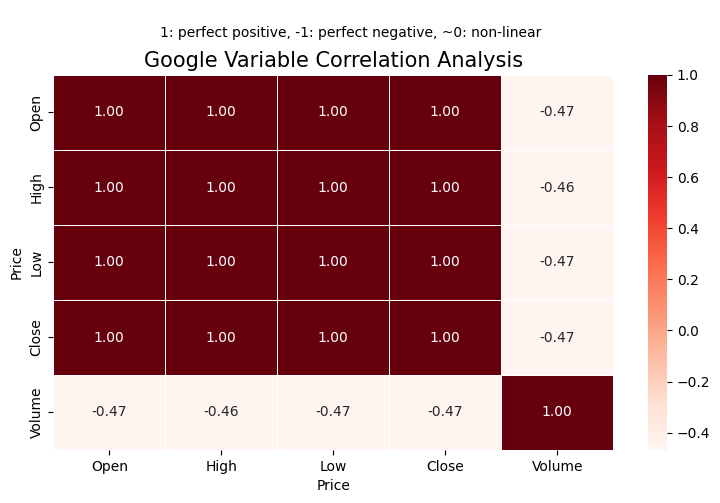

In [ ]:
# Drop the 'Date' column (if it exists) and calculate the correlation matrix
google2 = google.copy()
correlation_matrix = google2.drop(columns=['Date']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5, linecolor='white')

# Customize the plot
plt.title('Google Variable Correlation Analysis', fontsize=15)
plt.suptitle("\n1: perfect positive, -1: perfect negative, ~0: non-linear \n", fontsize=10)

# Remove extra margins
plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1)

# Show plot
plt.show()

Nabil

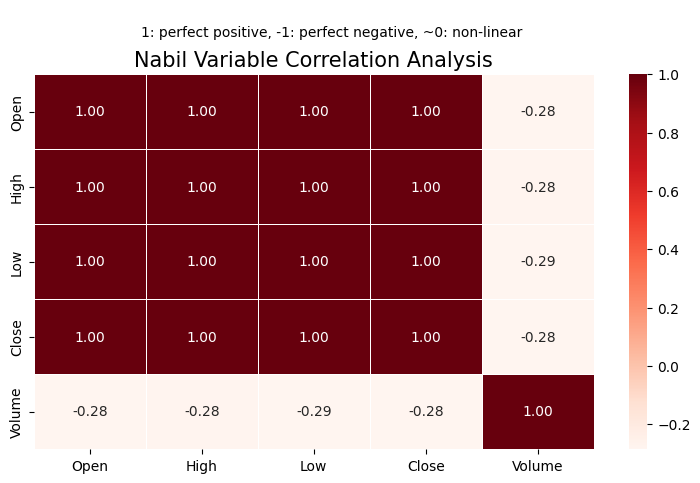

In [ ]:
# Drop the 'Date' column (if it exists) and calculate the correlation matrix
nabil2 = nabil.copy()
correlation_matrix = nabil2.drop(columns=['Date']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5, linecolor='white')

# Customize the plot
plt.title('Nabil Variable Correlation Analysis', fontsize=15)
plt.suptitle("\n1: perfect positive, -1: perfect negative, ~0: non-linear \n", fontsize=10)

# Remove extra margins
plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1)

# Show plot
plt.show()

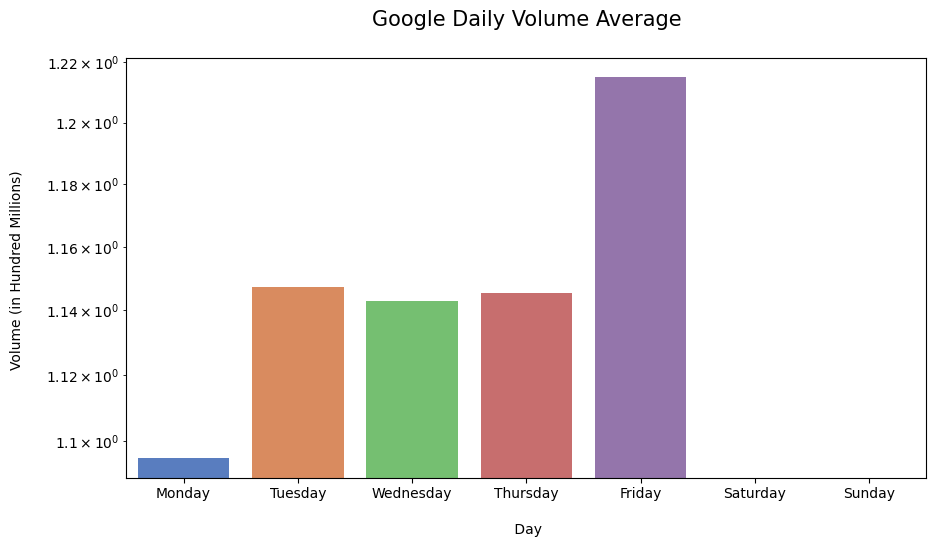

In [ ]:
# Assuming google_volume is a pandas DataFrame and 'Date' and 'Volume' are columns.
google1['Date'] = pd.to_datetime(google1['Date'])

# Add a column for day of the week
google1['Day'] = google1['Date'].dt.day_name()

# Calculate average volume per day of the week
average_per_day = google1.groupby('Day')['Volume'].mean().reset_index()
average_per_day['Average_per_Day'] = average_per_day['Volume'] / 10**8

# Sort days in proper weekday order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_per_day['Day'] = pd.Categorical(average_per_day['Day'], categories=days_order, ordered=True)
average_per_day = average_per_day.sort_values('Day')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Average_per_Day', data=average_per_day, palette='muted')

# Logarithmic scale for y-axis
plt.yscale('log')

# Customize the plot
plt.title('Google Daily Volume Average\n', fontsize=15)
plt.ylabel('Volume (in Hundred Millions) \n')
plt.xlabel('\n Day')

# Remove the legend if needed
plt.legend([], [], frameon=False)

# Adjust margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Show plot
plt.show()

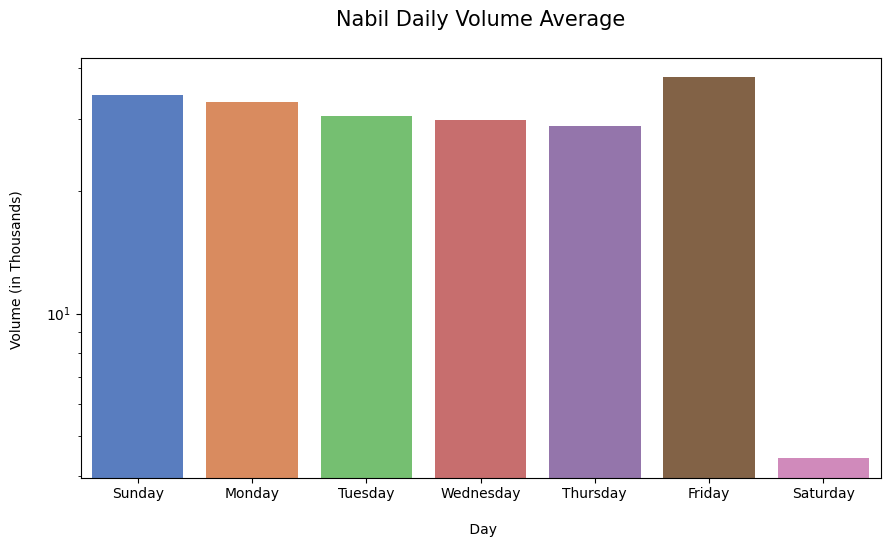

In [ ]:
# Assuming nabil_volume is a pandas DataFrame and 'Date' and 'Volume' are columns.
nabil1['Date'] = pd.to_datetime(nabil1['Date'])

# Add a column for day of the week
nabil1['Day'] = nabil1['Date'].dt.day_name()

# Calculate average volume per day of the week
average_per_day = nabil1.groupby('Day')['Volume'].mean().reset_index()
average_per_day['Average_per_Day'] = average_per_day['Volume'] / 10**3

# Sort days in proper weekday order
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_per_day['Day'] = pd.Categorical(average_per_day['Day'], categories=days_order, ordered=True)
average_per_day = average_per_day.sort_values('Day')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Average_per_Day', data=average_per_day, palette='muted')

# Logarithmic scale for y-axis
plt.yscale('log')

# Customize the plot
plt.title('Nabil Daily Volume Average\n', fontsize=15)
plt.ylabel('Volume (in Thousands) \n')
plt.xlabel('\n Day')

# Remove the legend if needed
plt.legend([], [], frameon=False)

# Adjust margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Show plot
plt.show()

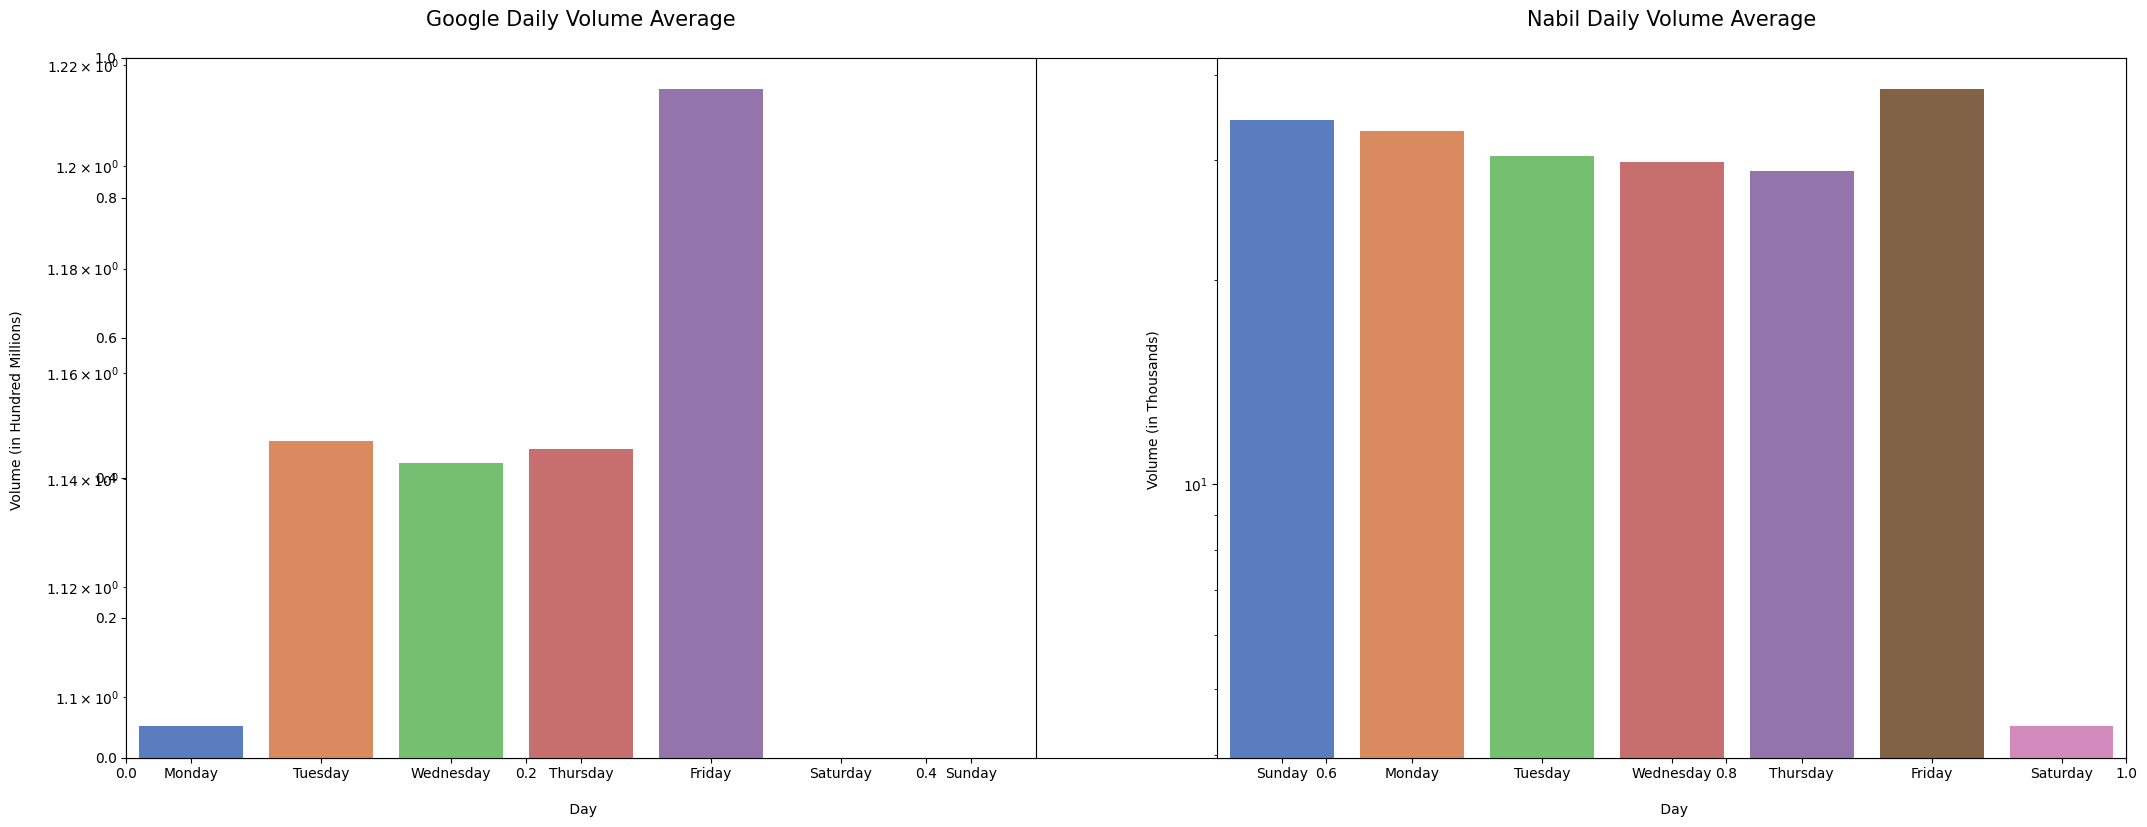

In [ ]:
## Google

google1['Date'] = pd.to_datetime(google1['Date'])

# Add a column for day of the week
google1['Day'] = google1['Date'].dt.day_name()

# Calculate average volume per day of the week
average_per_day_google = google1.groupby('Day')['Volume'].mean().reset_index()
average_per_day_google['Average_per_Day'] = average_per_day_google['Volume'] / 10**8

# Sort days in proper weekday order
days_order_google = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_per_day_google['Day'] = pd.Categorical(average_per_day_google['Day'], categories=days_order_google, ordered=True)
average_per_day_google = average_per_day_google.sort_values('Day')

plt.subplots(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.barplot(x='Day', y='Average_per_Day', data=average_per_day_google, palette='muted')

# Logarithmic scale for y-axis
plt.yscale('log')

# Customize the plot
plt.title('Google Daily Volume Average\n', fontsize=15)
plt.ylabel('Volume (in Hundred Millions) \n')
plt.xlabel('\n Day')

# Remove the legend if needed
plt.legend([], [], frameon=False)

# Adjust margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)


# Assuming nabil_volume is a pandas DataFrame and 'Date' and 'Volume' are columns.
nabil1['Date'] = pd.to_datetime(nabil1['Date'])

# Add a column for day of the week
nabil1['Day'] = nabil1['Date'].dt.day_name()

# Calculate average volume per day of the week
average_per_day_nabil = nabil1.groupby('Day')['Volume'].mean().reset_index()
average_per_day_nabil['Average_per_Day'] = average_per_day_nabil['Volume'] / 10**3

# Sort days in proper weekday order
days_order_nabil = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_per_day_nabil['Day'] = pd.Categorical(average_per_day_nabil['Day'], categories=days_order_nabil, ordered=True)
average_per_day_nabil = average_per_day_nabil.sort_values('Day')

# Plotting
plt.subplot(1, 2, 2)
sns.barplot(x='Day', y='Average_per_Day', data=average_per_day_nabil, palette='muted')

# Logarithmic scale for y-axis
plt.yscale('log')

# Customize the plot
plt.title('Nabil Daily Volume Average\n', fontsize=15)
plt.ylabel('Volume (in Thousands) \n')
plt.xlabel('\n Day')

# Remove the legend if needed
plt.legend([], [], frameon=False)

# Adjust margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Show plot
plt.show()